In [3]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from collections import Counter

In [6]:
# === 2. Load and Clean Data ===
file_path = 'CrimeData.csv'  # Raw dataset
df = pd.read_csv(file_path, low_memory=False)

# Drop rows without coordinates
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Convert Date column to datetime automatically
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[df['Date'].notna()]

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['hour'] = df['Date'].dt.hour

# Save cleaned dataset
df.to_csv('New_CrimeData.csv', index=False)
print(f"Cleaned data saved as 'New_CrimeData.csv'. Shape: {df.shape}")


<ipython-input-6-da82cddda6c8>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Cleaned data saved as 'New_CrimeData.csv'. Shape: (189365, 13)


In [7]:
# === 3. Feature Engineering ===
hotspot_crimes = ["STREET", "RESIDENTIAL YARD (FRONT/BACK)"]
df.loc[:, 'is_hotspot'] = df['LocationDescription'].apply(lambda x: 1 if x in hotspot_crimes else 0)

features = df[['Year', 'month', 'hour']]
labels = df['is_hotspot']

In [8]:
# === 4. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


In [9]:
# === 5. Train Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# === 6. Predictions ===
y_pred = clf.predict(X_test)

In [11]:
# === 7. Evaluation ===
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[   15  9785]
 [   43 46967]]

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.00      0.00      9800
           1       0.83      1.00      0.91     47010

    accuracy                           0.83     56810
   macro avg       0.54      0.50      0.45     56810
weighted avg       0.73      0.83      0.75     56810



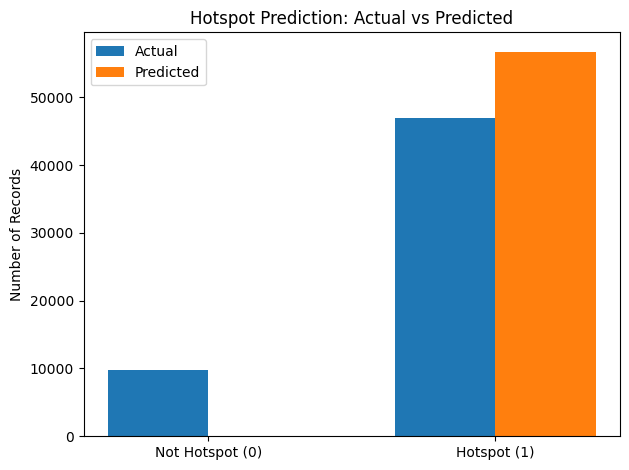

In [12]:
# === 8. Visualization: Actual vs Predicted Counts ===
pred_counts = Counter(y_pred)
actual_counts = Counter(y_test)

labels_bar = [0, 1]
pred_vals = [pred_counts.get(label, 0) for label in labels_bar]
actual_vals = [actual_counts.get(label, 0) for label in labels_bar]

x = np.arange(len(labels_bar))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, actual_vals, width, label='Actual')
ax.bar(x + width/2, pred_vals, width, label='Predicted')

ax.set_xticks(x)
ax.set_xticklabels(['Not Hotspot (0)', 'Hotspot (1)'])
ax.set_ylabel('Number of Records')
ax.set_title('Hotspot Prediction: Actual vs Predicted')
ax.legend()
plt.tight_layout()
plt.show()


In [13]:
# === 9. Save Predictions ===
df.loc[:, 'predicted_hotspot'] = clf.predict(features)
df.to_csv('predicted_hotspots.csv', index=False)
print(f"Predicted crime data saved to: 'predicted_hotspots.csv'")


Predicted crime data saved to: 'predicted_hotspots.csv'


In [14]:
# === 10. Summary Statistics ===
print("\n=== Summary Statistics for Time Features ===")
print(df[['Year', 'month', 'hour']].describe())

print("\n=== Top Crime Locations ===")
print(df['LocationDescription'].value_counts().head(10))

print("\n=== Hotspot Class Distribution ===")
print(df['is_hotspot'].value_counts())



=== Summary Statistics for Time Features ===
                Year          month           hour
count  189365.000000  189365.000000  189365.000000
mean     2006.166905       6.591456      13.109836
std         3.514025       3.430901       7.317894
min      2001.000000       1.000000       0.000000
25%      2003.000000       4.000000       7.000000
50%      2006.000000       7.000000      14.000000
75%      2009.000000      10.000000      20.000000
max      2012.000000      12.000000      23.000000

=== Top Crime Locations ===
LocationDescription
STREET                            154761
PARKING LOT/GARAGE(NON.RESID.)     14620
OTHER                               4495
ALLEY                               2285
GAS STATION                         2084
DRIVEWAY - RESIDENTIAL              1661
RESIDENTIAL YARD (FRONT/BACK)       1529
RESIDENCE                           1293
RESIDENCE-GARAGE                    1160
VACANT LOT/LAND                      977
Name: count, dtype: int64

=== Hotsp

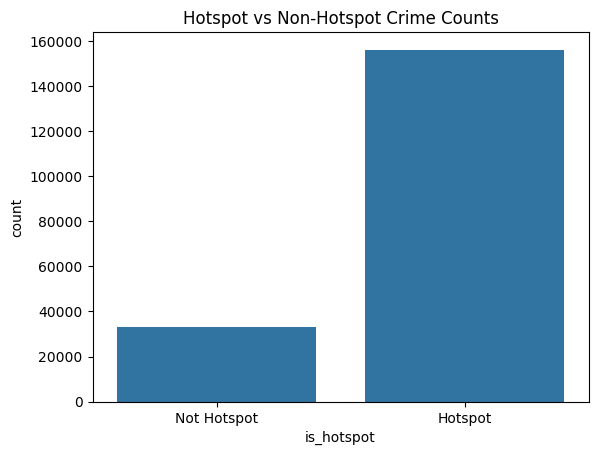

In [15]:
# === 11. Optional Visualization: Hotspot Distribution ===
sns.countplot(x='is_hotspot', data=df)
plt.xticks([0, 1], ['Not Hotspot', 'Hotspot'])
plt.title('Hotspot vs Non-Hotspot Crime Counts')
plt.show()